# Régression linéaire à plusieurs variables - Exercices tirés du MOOC d'Andrew Ng

## Chargement des données

Le jeu de données donne la valeur de plusieurs maisons, ainsi que leur taille (pieds carrés) et le nombre de chambres à coucher

### Chargez les données du fichier ex1data1.csv

In [587]:
import numpy as np
import pandas as pd

In [588]:
data = pd.read_csv("ex1data2.csv")

### Visualisez les données (valeurs réelles)

Maintenant, nous avons deux 'features'. Voyez si elles ont le même ordre de grandeur

In [589]:
data

,size,nb_bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


## Définissez quelques variables utiles

### Définissez X et y

X est maintenant une matrice de dimensions m x 2

In [590]:
X = np.c_[np.array(data['size'], float), np.array(data['nb_bedrooms'], float)]
X = np.matrix(X)
y = np.matrix([data['price']], float)
y = y.T

### Initialisez theta (combien de dimensions?)

In [591]:
theta = np.matrix([[0],[0],[0]])

### Vérifiez les dimensions de theta et X. Sont-elles compatibles pour implémenter la fonction d'hypothèse?

### Modifiez X en conséquence

## Écrivez une fonction pour normaliser les features

In [592]:
def featureNormalize(X):
    
    mu = np.matrix([X[:,0].mean(), X[:,1].mean()])
    sigma = np.matrix([X[:,0].std(), X[:,1].std()])
    
    X_norm = (X - mu) / sigma
    
    return X_norm, mean, stdev

In [593]:

X, mean, stdev = featureNormalize(X)



In [594]:
X = np.c_[np.ones(np.size(data['size'])), X]

In [595]:
y


matrix([[399900.],
        [329900.],
        [369000.],
        [232000.],
        [539900.],
        [299900.],
        [314900.],
        [198999.],
        [212000.],
        [242500.],
        [239999.],
        [347000.],
        [329999.],
        [699900.],
        [259900.],
        [449900.],
        [299900.],
        [199900.],
        [499998.],
        [599000.],
        [252900.],
        [255000.],
        [242900.],
        [259900.],
        [573900.],
        [249900.],
        [464500.],
        [469000.],
        [475000.],
        [299900.],
        [349900.],
        [169900.],
        [314900.],
        [579900.],
        [285900.],
        [249900.],
        [229900.],
        [345000.],
        [549000.],
        [287000.],
        [368500.],
        [329900.],
        [314000.],
        [299000.],
        [179900.],
        [299900.],
        [239500.]])

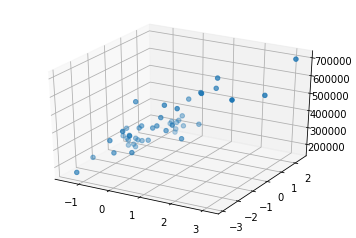

In [596]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,1], X[:,2], y)

### Maintenant nous allons devoir adapter nos fonctions _predict_, _fit_, et _cost_ à une situation à plusieurs variables

In [597]:
def predict(X, theta):
    return (X * theta)

In [598]:
def cost(X, y, theta):
    m = np.size(X[:,0])
    return (1 / (2 * m) * ((X * theta - y).T * (X * theta - y))).item(0)

In [599]:
predict(X, theta)

matrix([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [600]:
cost(X, y, theta)


65591548106.45744

In [601]:
def fit_with_cost(X, y, theta, alpha, num_iters):
   # À compléter
    # Initialiser certaines variable utiles
    m = np.size(X)
    tmp1 = 0
    tmp2 = 0
    j_history = []
    
    # Boucler sur le nombre d'itérations
    for i in range(num_iters):
        tmp = theta - alpha / m * (np.matmul(X.T, (np.matmul(X,theta) - y)))
        theta = tmp
                                   
        j_history.append(cost(X, y, theta))

    return theta, j_history

## Lancez l'entrainement du modèle

Vous êtes libres de choisir alpha et num_iters cette fois!

N'oubliez pas de récupérer la moyenne et l'écart-type calculés!

In [602]:

ret, J_history = fit_with_cost(X, y, theta, 0.01, 400)

## Visualisez l'évolution du coût (graphe de convergence)

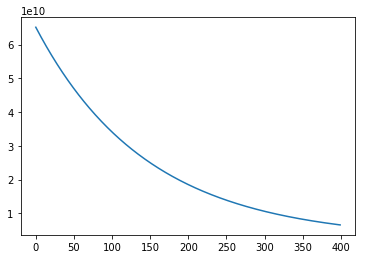

In [603]:
import matplotlib.pyplot as plt

fit = plt.figure()
ax = plt.axes()
ax.plot(J_history)

In [604]:
ret = [[334302.063993], [100087.116006], [3673.548451]]
cost(X, y, ret)

2104574534.1213126

## Testez votre modèle

Que vaut une maison de 1650 pieds carrés et de 3 chambres à coucher? (Si la valeur est aberrante, vous avez peut-être oublié une étape...)

In [605]:
price = np.c_[np.ones(1), (np.matrix([1650, 3]) - mean) / stdev] * ret
price

matrix([[2.00127056e+20]])

In [585]:
#predict(np.c_[np.ones(1), price], ret)

ValueError: shapes (1,2) and (3,1) not aligned: 2 (dim 1) != 3 (dim 0)